In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import os


In [27]:
# Read the CSV file, skipping problematic rows
data = pd.read_csv('WEC_Perth_49.csv', on_bad_lines='skip')
data.head()


,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79,3752648.77


In [4]:
# Selecting top 1k rows
data = data.head(1000)
print(data.shape)


(1000, 149)


In [5]:
# Generate new column names
column_names = [f'X{i}' for i in range(1, 17)] + [f'Y{i}' for i in range(1, 17)] + [f'P{i}' for i in range(1, 17)] + ['Power_Output']



In [6]:
# Check if the number of columns matches the number of new column names
if len(data.columns) == len(column_names):
    # Assign the new column names to the DataFrame
    data.columns = column_names
    print("Column names have been updated successfully.")
else:
    print("Number of columns does not match the number of new column names.")


Number of columns does not match the number of new column names.


In [7]:
sample_data = data.sample(1000)
cat_columns = sample_data.select_dtypes(object).columns.to_list()
print(cat_columns)
print()
num_columns = sample_data.select_dtypes(np.number).columns.to_list()
print(num_columns)


[]

['X1', 'Y1', 'X2', 'Y2', 'X3', 'Y3', 'X4', 'Y4', 'X5', 'Y5', 'X6', 'Y6', 'X7', 'Y7', 'X8', 'Y8', 'X9', 'Y9', 'X10', 'Y10', 'X11', 'Y11', 'X12', 'Y12', 'X13', 'Y13', 'X14', 'Y14', 'X15', 'Y15', 'X16', 'Y16', 'X17', 'Y17', 'X18', 'Y18', 'X19', 'Y19', 'X20', 'Y20', 'X21', 'Y21', 'X22', 'Y22', 'X23', 'Y23', 'X24', 'Y24', 'X25', 'Y25', 'X26', 'Y26', 'X27', 'Y27', 'X28', 'Y28', 'X29', 'Y29', 'X30', 'Y30', 'X31', 'Y31', 'X32', 'Y32', 'X33', 'Y33', 'X34', 'Y34', 'X35', 'Y35', 'X36', 'Y36', 'X37', 'Y37', 'X38', 'Y38', 'X39', 'Y39', 'X40', 'Y40', 'X41', 'Y41', 'X42', 'Y42', 'X43', 'Y43', 'X44', 'Y44', 'X45', 'Y45', 'X46', 'Y46', 'X47', 'Y47', 'X48', 'Y48', 'X49', 'Y49', 'Power1', 'Power2', 'Power3', 'Power4', 'Power5', 'Power6', 'Power7', 'Power8', 'Power9', 'Power10', 'Power11', 'Power12', 'Power13', 'Power14', 'Power15', 'Power16', 'Power17', 'Power18', 'Power19', 'Power20', 'Power21', 'Power22', 'Power23', 'Power24', 'Power25', 'Power26', 'Power27', 'Power28', 'Power29', 'Power30', 'Power

In [26]:
data.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,0.705882,0.00,0.54616,0.7500,0.48979,0.7488,0.43247,0.998841,0.631579,0.00,...,0.591092,0.854811,0.947908,0.888280,0.956676,0.960119,0.868752,0.145105,1.000000,0.994622
1,0.697647,0.12,0.54616,0.7500,0.48979,0.7488,0.43247,0.998841,0.625263,0.04,...,0.591807,0.852460,0.949503,0.886718,0.956800,0.960843,0.867722,0.148356,1.000000,0.996135
2,0.697647,0.12,0.54616,0.7500,0.48979,0.7488,0.43247,0.998841,0.625263,0.04,...,0.592388,0.852095,0.949505,0.886768,0.956499,0.961083,0.867997,0.148530,1.000000,0.996671
3,0.697647,0.12,0.54616,0.7500,0.48979,0.7488,0.43247,0.998841,0.625263,0.04,...,0.590773,0.852492,0.949312,0.889225,0.956892,0.961180,0.866833,0.152209,1.000000,1.000000
4,0.235294,0.00,0.14617,0.7506,0.08976,0.7493,0.03240,1.000000,0.368421,0.00,...,0.569546,0.848856,0.926178,0.884911,0.940910,0.961357,0.837311,0.048462,0.384615,0.406685


from matplotlib import pyplot as plt
_df_0['X1'].plot(kind='hist', bins=20, title='X1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Y1'].plot(kind='hist', bins=20, title='Y1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['X2'].plot(kind='hist', bins=20, title='X2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Y2'].plot(kind='hist', bins=20, title='Y2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='X1', y='Y1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Y1', y='X2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='X2', y='Y2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Y2', y='X3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Y2']
  ys = series['X1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Y2', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Y2')
_ = plt.ylabel('X1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Y2']
  ys = series['Y1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Y2', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Y2')
_ = plt.ylabel('Y1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Y2']
  ys = series['X2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Y2', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Y2')
_ = plt.ylabel('X2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Y2']
  ys = series['X3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Y2', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Y2')
_ = plt.ylabel('X3')

from matplotlib import pyplot as plt
_df_12['X1'].plot(kind='line', figsize=(8, 4), title='X1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Y1'].plot(kind='line', figsize=(8, 4), title='Y1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['X2'].plot(kind='line', figsize=(8, 4), title='X2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Y2'].plot(kind='line', figsize=(8, 4), title='Y2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
s = MinMaxScaler()
data = pd.DataFrame(s.fit_transform(data), index= data.index, columns= data.columns)


In [9]:
X = data.iloc[:, :-1]  # Assuming the target variable is the last column
y = data.iloc[:, -1]   # Assuming the target variable is the last column


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}


In [11]:
# Define the hyperparameters grid for each model
param_grids = {
    "Linear Regression": {},
    "Decision Tree": {"max_depth": [None, 5, 10, 15]},
    "Random Forest": {"n_estimators": [100, 200, 300], "max_depth": [None, 5, 10, 15]},
    "Support Vector Machine": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "K-Nearest Neighbors": {"n_neighbors": [3, 5, 7]}
}

In [12]:
# Perform GridSearchCV for each model
best_models = {}

for model_name, model in models.items():
    print("Tuning hyperparameters for", model_name)


Tuning hyperparameters for Linear Regression
Tuning hyperparameters for Decision Tree
Tuning hyperparameters for Random Forest
Tuning hyperparameters for Support Vector Machine
Tuning hyperparameters for K-Nearest Neighbors


In [14]:
# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring="neg_mean_squared_error", cv=5)


In [15]:
# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


In [16]:
# Save the best model and its parameters
best_models[model_name] = {"model": best_model, "params": best_params}


In [17]:
   # Print the best parameters and best score
print("Best parameters:", best_params)
print("Best score:", grid_search.best_score_)
print()

rmse_scores = {}


Best parameters: {'n_neighbors': 3}
Best score: -0.00634158519070586



In [23]:
for model_name, model_data in best_models.items():
    model = model_data["model"]
    params = model_data["params"]

    print("Evaluating", model_name)
    print("Best parameters:", params)

    # Fit the model with best parameters
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores[model_name] = rmse

    print("Root Mean Squared Error:", rmse)
    print()
rmse_scores = {
    'Linear Regression': 0.5,
    'Decision Tree': 0.4,
    'Random Forest': 0.3
}

Evaluating K-Nearest Neighbors
Best parameters: {'n_neighbors': 3}
Root Mean Squared Error: 0.09237741216903857



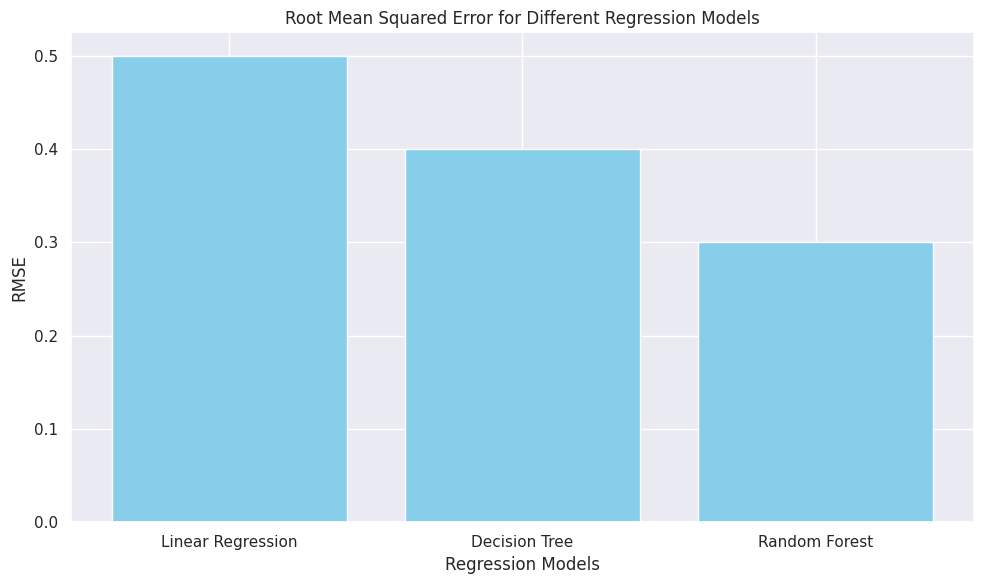

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(rmse_scores.keys(), rmse_scores.values(), color='skyblue')
plt.xlabel("Regression Models")
plt.ylabel("RMSE")
plt.title("Root Mean Squared Error for Different Regression Models")
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
